In [12]:
#importing and labelling data
#service represents customer service, activity represents online activity as referred to table above
import pandas as pd
excelfile = pd.ExcelFile("Customer_Churn_Data_Large.xlsx")
excelfile.sheet_names
demographics = pd.read_excel(excelfile, "Customer_Demographics")
transactions = pd.read_excel(excelfile, "Transaction_History")
service = pd.read_excel(excelfile, "Customer_Service")
activity = pd.read_excel(excelfile, "Online_Activity")
churn = pd.read_excel(excelfile, "Churn_Status")

#select only correct columns from demographics dataframe
demographics_selected = demographics[['CustomerID', 'Age', 'Gender', 'IncomeLevel', 'MaritalStatus']]

#merging data under key CustomerID
df = demographics_selected.merge(transactions, on="CustomerID", how="left")
df = df.merge(service, on="CustomerID", how="left")
df = df.merge(activity, on="CustomerID", how="left")
df = df.merge(churn, on="CustomerID", how="left")
df.fillna({
    'IncomeLevel': 'Missing',
}, inplace=True)

#remove outliers as needed//set bounds for outliers by quantiles
for col in ['Age', 'AmountSpent', 'LoginFrequency']:
    q01 = df[col].quantile(0.01)
    q99 = df[col].quantile(0.99)
    df[col] = df[col].clip(q01, q99)

df = pd.get_dummies(df, drop_first=True)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric] = scaler.fit_transform(df[numeric])
df.to_csv("cleaned_churn_dataset.csv", index=False)

## Analyze churn distribution

### Subtask:
Visualize the distribution of the 'ChurnStatus' column to understand the proportion of churned versus non-churned customers.


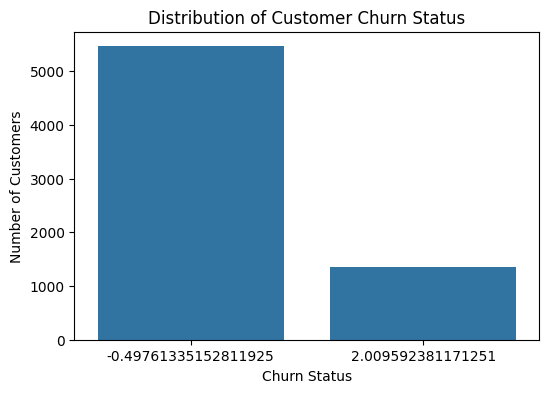

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='ChurnStatus', data=df)
plt.title('Distribution of Customer Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.show()

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
exclude_cols = ['CustomerID', 'TransactionID', 'ChurnStatus']
numerical_cols = [col for col in numerical_cols if col not in exclude_cols]

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()